## The qubit wave function 

The IBM Q quantum computer is a remarkable quantum experiment, which we can set up and run using Jupyter Nootebooks just as this. The basic building block we have at our disposal is a qubit, and here we will use the qubits to set up a wave function and measure position. (We will study the qubits themselves in detail later.) 

**What:** We will set up a spatial wave function and perform measurements of the position. Furthermore we will see how a measurement of the position leads to the collapsed wave function. 

**Learning objective:** To obtain a first understanding of what a wave funtion is and get expirence with measurement of position. Observe the collapse of the wave function.

To get going let's first import the relevant libraries:

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *

from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import assemble

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

**How to set up a wave function with q-bits:** 

A wave function $\Psi(x,t)$ is a continous function of both space and time. For simplicity we will consider time fixed at $t=0$ and position confined to the length $L$, ie. $x\in[0,L]$. 

We will think of each qubit as a possible position, $x_j=a j$, where $j=0, 1, 2, \ldots N-1$ and $a=L/N$ with $N$ is the number of qubits. So instead of $\Psi(x,t=0)$ we have $\Psi(x_j,t=0)$. (Strictly speaking $\Psi(x_j,t=0)$ is of course only a function as we take $N\to\infty$.)

As we are using the qubits in a slightly unconventional fashion we first define a function that allows us to set up the up the states we want.

In [2]:
#initialising a quantum circuit. 
def initial(N,M):
    q = QuantumRegister(N) #N is th number of qubits
    c = ClassicalRegister(M) #M is the number of bits
    qc = QuantumCircuit(q,c)
    return qc


#make desired vector: 
def state(liste,qc): 
    C = np.array(liste) #len(C) is the number of states. 

    N = len(C)
    H_d = 2**N
    
    fullstate = np.zeros(H_d)
    for k in range(N):
        fullstate[(1 << k) ]+=C[k]
        
    norm = np.linalg.norm(fullstate)
    fullstate = fullstate/norm
    return qc.initialize(fullstate.tolist(), qc.qubits)


Now let's use it to see what it looks like if we have 6 sites.

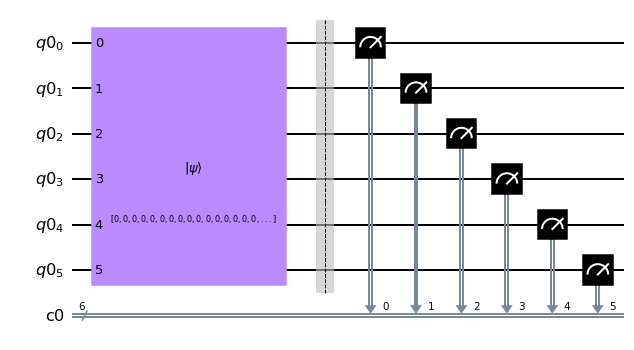

In [3]:
N=6
qc = initial(N,N)

state([0,0,0,0,0,1],qc)

qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.draw()

**How to read the diagram:** The 6 black horizontal lines each represent a qubit and hence a possible position. The big purple square set up the wave function we have entered in the 'state'. The vertical line just marks that now we have set up the wave function and are ready to do an experiment. Here we want to measure the position and this is what the black boxes with the gauge on them does. The arrows down to the bottom horisontal double-line indicate that the results of the measurements are stored in the classical bits marked by the number next to the arrow. 

**Our wave function:** 

We have set up the discrete wave function, such that 

\begin{equation}
\Psi(x_0,t=0) = 1  \quad {\rm and} \quad \Psi(x_j,t=0) = 0 \quad {\rm for} \quad j=1,\ldots,5 \ .
\end{equation}

Now let's try to measure the position!

In [6]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=1, memory=True).result()
memory = result.get_memory(qc)
counts = result.get_counts()
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
z=np.array([0,0,0,0,0,0])
for x in memory:
    position = y.index(x)
    z[position]=1
    for k in range(6) :
        print(z[k])    
    print() 
    print("Detected at position", position) 
    print() 

0
0
0
0
0
1

Detected at position 5



**How to read the result:** We have just performed our firts measurement of position! The position at which the particle was detected is marked by 1, so in this case we detected the particle at position 0 (the top one).

**Explaining the result:** The probability to detect the particle at a given site is given by the absolute square of the wave function at this site. In our example we have 


\begin{equation}
|\Psi(x_0,t=0)|^2 = 1  \quad {\rm and} \quad |\Psi(x_j,t=0)|^2 = 0 \quad {\rm for} \quad j=1,\ldots,5 \ .
\end{equation}

and hence there was 100% chance to detect the particle at the first site. 

**Exercise 1:** Repeat the experiment 10 times and make sure that you can explain the result. (There should be no surprises.)

This far everything is just like in the classical case, because the wave function was zero at all sites except one. (In the continuum case the corresponding the wave function is $\delta(x)$.) 

Let's us instead consider the oppsoite extreme where the wave function is constant, ie. it takes the same value on all 6 sites 

\begin{equation}
\Psi(x_j,t=0) = \frac{1}{\sqrt{6}} \quad {\rm for} \quad j=0,\ldots,5 \ .
\end{equation}

The wave function must normalized, that is it must satisfy 
\begin{equation}
\sum_{x_j=0}^{5}|\Psi(x_j,t=0)|^2 = 1 \ .
\end{equation}

Note that this is just like in the continuum case, only in the continuum case the sum is replaced by an integral, see e.g. eq. (1.20) of Griffiths and Schröeter. 

**Exercise 2:** Check that the wave function above is indeed normalized.

Now let's measure the position for a particle with the constant wave function! First we set up the experiment:

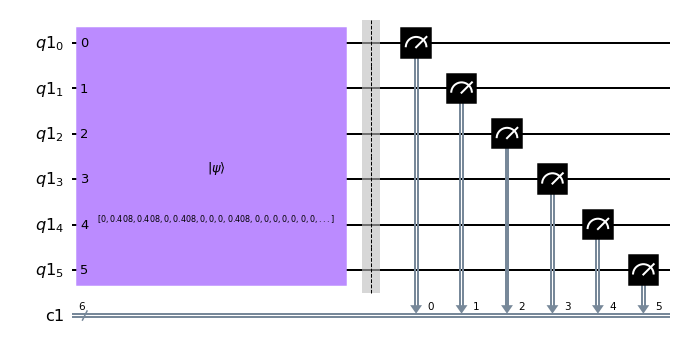

In [7]:
N=6
qc = initial(N,N)

state([1,1,1,1,1,1],qc)

qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.draw()

**How to read the diagram:** The big purple square sets up the constant wave function for us and then we do the measurement of position (we will come back to how the wave function is set up in a later exercise, it is a little more tricky than you might first think).

And now let's run the experiment:

In [11]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=1, memory=True).result()
memory = result.get_memory(qc)
counts = result.get_counts()
y = ()
for i in range(N):    
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
z=np.array([0,0,0,0,0,0])
for x in memory:
    position = y.index(x)
    z[position]=1
    for k in range(6) :
        print(z[k])    
    print() 
    print("Detected at position", position) 

0
0
1
0
0
0

Detected at position 2


**Exercise 3:** Try to run the experiment a few times and observe the results. 

The result is **truely remarkable!!** Even though the particle has exactly the same wave function each time we do the measurement of position, we are likely to detect it at different positions. Moreover, there is no way we with certaintly can pridict the exact position at which the particle is detected! The best we can do is to predict the probability that is is detected at a given site.

**Exercise 4:** Determine the probability that the particle is detected a the first site. Argue that  for the constant wave function we get the same probability to detect the particle at any of the 6 sites. 

**Exercise 5:** Show that the probabilities to detect the particle at ecah of the 6 sites add up to 1. Explain why this should indeed be the case. 

To check our result with better statistics let's run the experiment 1024 times:

**Don't miss:** Each time we do the measuremet we start all over. That is, we start by making sure that the wave function is constant and then we measure the position.  

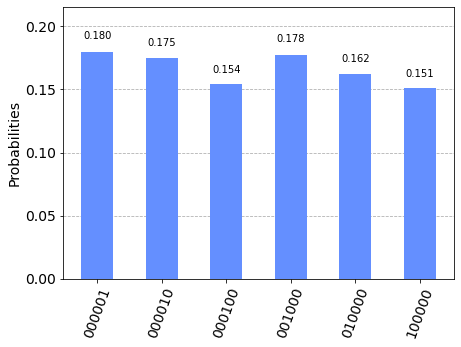

In [12]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**How to read the result:** We have just performed a quantum measurement of position an amazing 1024 times! The result are displayed in a histogram where each column corresponds to one of the 6 possible positions.

As we see, when the particle start with the constant wave function, it is equally likely to detect the particle at each site. Note that there will some smaller deviations from 1/6: after all we 'only' did the experiment 1024 times so there are still room for a bit of fluctuations.

**Collapse of the wave function:**

Finally something stunning happens if we repeat the measurement of position twice.

Let's give it a try!

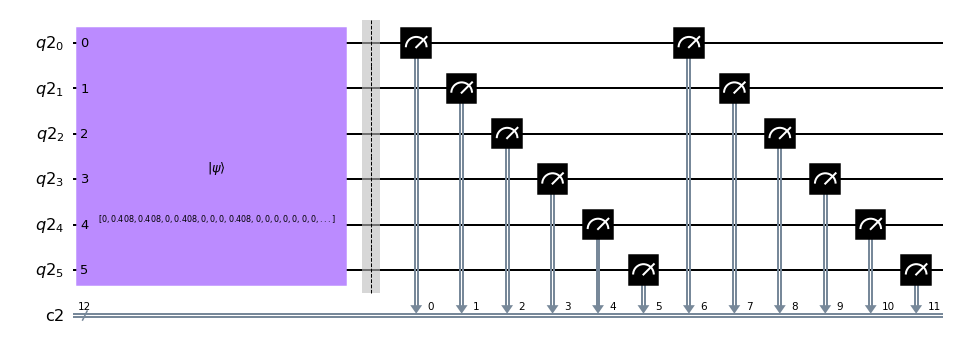

In [13]:
N=6
qc = initial(N,2*N)

state([1,1,1,1,1,1],qc)

qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.measure(0,6)
qc.measure(1,7)
qc.measure(2,8)
qc.measure(3,9)
qc.measure(4,10)
qc.measure(5,11)
qc.draw()

**How to read the diagram:** Everything is just like above, only now we measure the position twice.

In [14]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=1, memory=True).result()
memory = result.get_memory(qc)
y = ()
for i in range(N):    
    for k in range(N):
        element = "0"*(N-1-i)+"1"+"0"*i+"0"*(N-1-k)+"1"+"0"*k
        y = y + (element,) 
y = tuple(y)
z1=np.array([0,0,0,0,0,0])
z2=np.array([0,0,0,0,0,0])
for x in memory:
    position = y.index(x)
    position1=((position)//6)
    z1[position1]=1
    position2=(position-6*((position)//6))
    z2[position2]=1
    for k in range(6) :
        print(z1[k])    
    print() 
    print("Detected at position", position1) 
    print()
    print()
    for k in range(6) :
        print(z2[k])    
    print() 
    print("Detected at position", position2) 

0
0
1
0
0
0

Detected at position 2


0
0
1
0
0
0

Detected at position 2


**How to read the result:** The output is just like before, only now we do the measurement twice in a row.

**Exercise 6:** Try to run the experiment a few times and observe the results.

What we are observing here is one of the fundamental postulates of quantum mechanics in full action! After a measurement of position **the wave function collapses** to a $\delta$-function at the position where the particle was detected. In our discrete space the wave function collapses to a Kronecker $\delta$ such that the wave function becomes one on the site where it was detected and zero on all other sites. In the continuum case the wave function collapses to a Dirac $\delta$-function.

**Exercise 7:** Show the collapse of the wave function explains the obvervations we have just made in the experiment.

**Take home:** For a particle with a wave function, $\Psi(x,t)$, we can predict the probability that the particle is measured at a given position by taking the absolute square of the wave function at the position. We must however first check that the wave functions is normalized. After we have measured and detected the particle at a given site the wave function collapses such that is is zero everywhere **except** at the position where we detected the particle. 